### モジュールのロード

In [6]:
import glob
import os
import pandas as pd
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt

# 辞書に順序がある前提で書いている可能性があるので、python3.7以上でないと正常に動作しないかもしれない
# バージョンを確認のために出力
print(sys.version)

3.8.5 (default, Jul 22 2020, 18:54:26) 
[GCC 5.4.0 20160609]


### 変数・配列の宣言

In [2]:
# 各種値を宣言
bench_marks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp']
classes = ["S", "W", "A", "B", "C", "D"]
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
fix_process = 4
fix_benchmark_class = "C"
path = './'
marker_size = 12
marker_fig = "v"

### ベンチマークCG, LU, SPに関して、二種類のグラフを作成

#### fixed_C, fixed_process にCSVから読み取ったデータを格納する

In [3]:
path="./"
bench_marks = ['cg', 'lu', 'sp']

bench_marks = ['sp']
# fixed_C にはベンチマーククラスCで実行プロセス数が1 ~ 256までの結果が入る
fixed_C = list()
# fixed_process には実行プロセス数が64でベンチマーククラスがA ~ Dまでの結果が入る
fixed_process = list()

# summary_C には fixed_C をconcat, mergeなどでまとめた結果が入る
summary_C = pd.DataFrame()
# summary_fixed_process には fixed_process をconcat, mergeなどでまとめた結果が入る
summary_fixed_process = pd.DataFrame()

In [4]:
for bench_mark in bench_marks:
    for bench_mark_class in classes:
        for process in processes:
            
            file_name = ("pprof_"+bench_mark+bench_mark_class+str(process)+".csv")
            file_path = path+file_name
            if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
                data_frame = pd.read_csv(path+file_name)
                data_frame = data_frame.set_index(['Name'])
#                 print(data_frame)
                if (process == fix_process):
                    fixed_process.append(data_frame.rename(columns = {'#Call': bench_mark_class}).sort_index())
                if (bench_mark_class == fix_benchmark_class):
                    fixed_C.append(data_frame.rename(columns = {'#Call': process}).sort_index())

#### fixed_C, fixed_process に格納されているデータが空でない場合はそれらをそれぞれ、 summary_fixed_C, fummary_fixed_proccess に一つのデータフレームとしてまとめる

In [5]:
if (len(fixed_process) != 0):
    summary_fixed_process = pd.concat(fixed_process, axis=1)
if(len(fixed_C) != 0):
    summary_fixed_C = pd.concat(fixed_C, axis=1)

In [6]:
print(summary_fixed_process)

                           S          W           A           B            C
Name                                                                        
.TAU_application        1.00       1.00        1.00        1.00         1.00
ADD                   101.00     401.00      401.00      401.00       401.00
ADI                   101.00     401.00      401.00      401.00       401.00
ALLOC_SPACE             1.00       1.00        1.00        1.00         1.00
COMPUTE_BUFFER_SIZE     1.00       1.00        1.00        1.00         1.00
COMPUTE_RHS           102.00     402.00      402.00      402.00       402.00
COPY_FACES            102.00     402.00      402.00      402.00       402.00
ERROR_NORM              1.00       1.00        1.00        1.00         1.00
EXACT_RHS               1.00       1.00        1.00        1.00         1.00
EXACT_SOLUTION       7248.00  190200.00  1060300.00  4275140.00  17083400.00
INITIALIZE              2.00       2.00        2.00        2.00         2.00

In [7]:
print(summary_fixed_C)

                       2            4    8
.TAU_application     1.0         1.00  1.0
MPI_Abort()          1.0          NaN  1.0
MPI_Bcast()          1.0         4.00  1.0
MPI_Comm_rank()      1.0         1.00  1.0
MPI_Comm_size()      1.0         1.00  1.0
MPI_Init()           1.0         1.00  1.0
MPSP                 1.0         1.00  1.0
SETUP_MPI            1.0         1.00  1.0
ADD                  NaN       401.00  NaN
ADI                  NaN       401.00  NaN
ALLOC_SPACE          NaN         1.00  NaN
COMPUTE_BUFFER_SIZE  NaN         1.00  NaN
COMPUTE_RHS          NaN       402.00  NaN
COPY_FACES           NaN       402.00  NaN
ERROR_NORM           NaN         1.00  NaN
EXACT_RHS            NaN         1.00  NaN
EXACT_SOLUTION       NaN  17083400.00  NaN
INITIALIZE           NaN         2.00  NaN
LHSINIT              NaN         1.00  NaN
LHSX                 NaN       802.00  NaN
LHSY                 NaN       802.00  NaN
LHSZ                 NaN       802.00  NaN
MAKE_SET   

5


<Figure size 432x288 with 0 Axes>

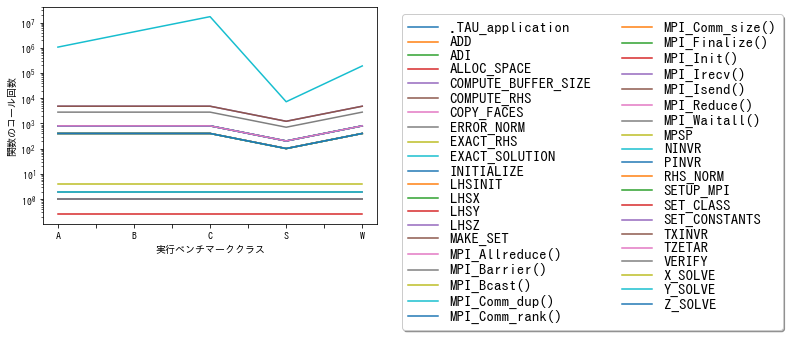

In [8]:
print(len(fixed_process))
if(len(fixed_process) != 0):
    summary_fixed_process.sort_index(axis=1, inplace=True)
    summary_fixed_process_title = bench_mark+"において実行プロセス数を"+str(fix_process)+"に固定しベンチマーククラスを変化させたときの実行された全ての関数のコール回数"
    plt.figure()
    summary_fixed_process.T.plot(xlabel="実行ベンチマーククラス",ylabel="関数のコール回数",logy=True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True, ncol=2, prop={'size':15}, labelspacing=0.1)
    # plt.savefig(path+bench_mark+'_32.png', bbox_inches="tight")
    # plt.close('all')

3


<Figure size 432x288 with 0 Axes>

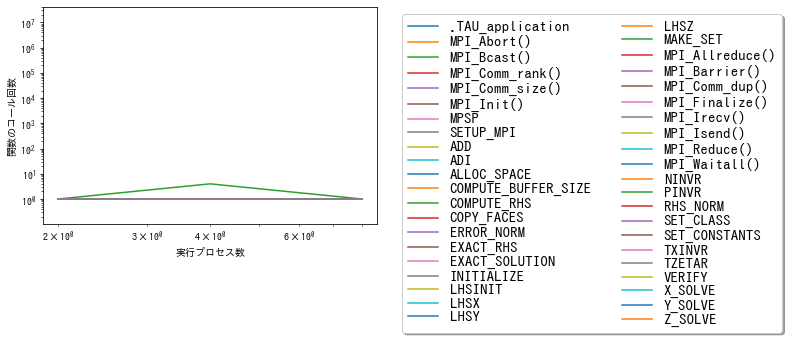

In [9]:
print(len(fixed_C))
if(len(fixed_C) != 0):
    summary_fixed_C.sort_index(axis=1, inplace=True)
    summary_fixed_C_title = bench_mark+"においてベンチマーククラスをCに固定し実行プロセス数を変化させたときの実行された全ての関数のコール回数"
    plt.figure()
    summary_fixed_C.T.plot(xlabel="実行プロセス数",ylabel="関数のコール回数",logx=True, logy=True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True, ncol=2, prop={'size':15}, labelspacing=0.1)
    # plt.savefig(path+bench_mark+"_C.png", bbox_inches="tight")
    # plt.close('all')

# print("\n")
# print("summary_Cの詳細情報表示")
# print("行数は"+str(len(summary_fixed_C))+" 列数は"+str(len(summary_fixed_C.columns)))
# print("summary_Cの表示")
# print(summary_fixed_C)

# print("summary_fixed_processの詳細情報表示")
# print("行数は"+str(len(summary_fixed_process))+" 列数は"+str(len(summary_fixed_process.columns)))
# print("summary_fixed_processの表示")
# print(summary_fixed_process)
# print("\n")





### 引数に処理するベンチマーク名・プロセス数・ベンチマーククラスを格納した配列をとり、それらを集計しつつグラフを生成する関数

In [25]:
def show_graph(BenchMarks=[], Processes=[], BenchMarkClasses=[], fix_process=4, fix_benchmark_class="C"):
    path = './'

    if (BenchMarks==[] or Processes==[] or BenchMarkClasses==[]):
        print("関数の引数となっている配列が空です。")
    else:
        for bench_mark in BenchMarks:
                
            # fixed_C にはベンチマーククラスCで実行プロセス数が1 ~ 256までの結果が入る
            fixed_C = list()
            # fixed_process には実行プロセス数が64でベンチマーククラスがA ~ Dまでの結果が入る
            fixed_process = list()

            for bench_mark_class in BenchMarkClasses:
                for process in Processes:
            
                    file_name = ("pprof_"+bench_mark+bench_mark_class+str(process)+".csv")
                    file_path = path+file_name
                    if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
                        data_frame = pd.read_csv(path+file_name)
                        data_frame = data_frame.set_index(['Name'])
#                 print(data_frame)
                        if (process == fix_process):
                            fixed_process.append(data_frame.rename(columns = {'#Call': bench_mark_class}).sort_index())
#                             fixed_process.append(data_frame.rename(columns = {'#Call': bench_mark_class}))
                        if (bench_mark_class == fix_benchmark_class):
                            fixed_C.append(data_frame.rename(columns = {'#Call': process}).sort_index())
            if (len(fixed_process) != 0):
                summary_fixed_process = pd.concat(fixed_process, axis=1)
            if(len(fixed_C) != 0):
                summary_fixed_C = pd.concat(fixed_C, axis=1)
            print(summary_fixed_process)
            print(summary_fixed_C)
            print(len(fixed_process))
            if(len(fixed_process) != 0):
#                 summary_fixed_process.sort_index(axis=1, inplace=True)
                summary_fixed_process_title = bench_mark+"において実行プロセス数を"+str(fix_process)+"に固定しベンチマーククラスを変化させたときの実行された全ての関数のコール回数"
                plt.figure()
                summary_fixed_process.T.plot(xlabel="実行ベンチマーククラス",ylabel="関数のコール回数",logy=True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True, ncol=2, prop={'size':15}, labelspacing=0.1)


                          S        W       A       B          C          D
Name                                                                      
.TAU_application          1      1.0       1       1        1.0        1.0
ALLOC_SPACE               1      1.0       1       1        1.0        1.0
CG                        1      1.0       1       1        1.0        1.0
CONJ_GRAD                16     16.0      16      46       76.0       76.0
ICNVRT                14497  39990.5  122916  943178  2821070.0  3936140.0
INITIALIZE_MPI            1      1.0       1       1        1.0        1.0
MAKEA                     1      1.0       1       1        1.0        1.0
MPI_Barrier()             1      1.0       1       1        1.0        1.0
MPI_Bcast()               1      1.0       1       1        1.0        1.0
MPI_Comm_rank()           1      1.0       1       1        1.0        1.0
MPI_Comm_size()           1      1.0       1       1        1.0        1.0
MPI_Finalize()           

<Figure size 432x288 with 0 Axes>

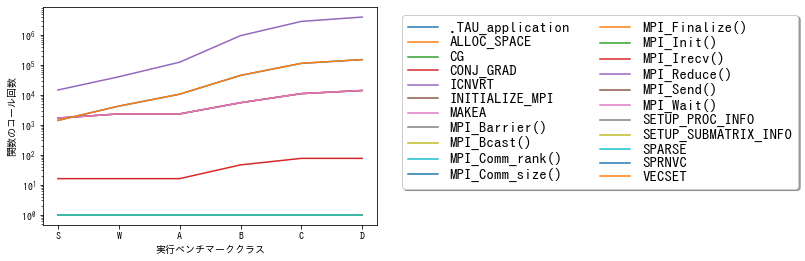

<Figure size 432x288 with 0 Axes>

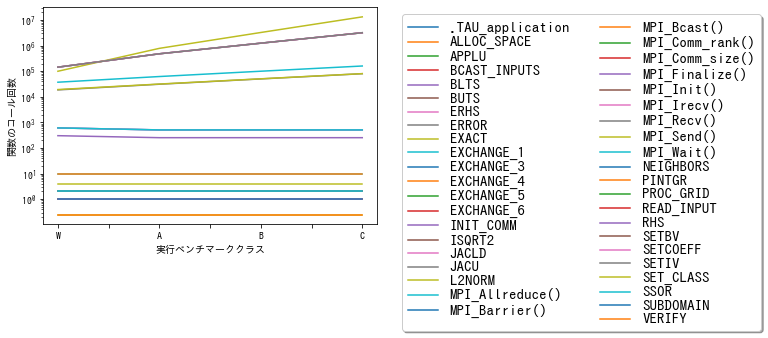

<Figure size 432x288 with 0 Axes>

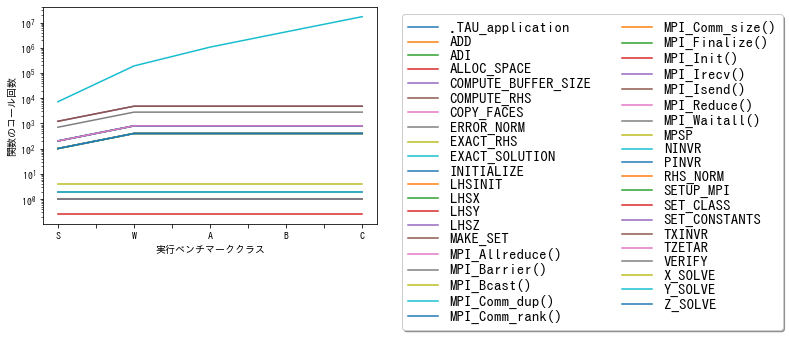

In [26]:
benchmarks = ['cg', 'lu', 'sp']
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
classes = ["S", "W", "A", "B", "C", "D"]
show_graph(benchmarks, processes, classes)